### Evaluate thresholds for each classes

In [2]:
import numpy as np
from tqdm import tqdm
import os
import json
from Network_Copy1 import Network
from Evaluator import Evaluator

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import math
import os
import copy
import time
import sqlite3 as sql
import cv2
from tqdm import tqdm

/home/mdelabrassinne/anaconda3/envs/envDeepLearning/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mdelabrassinne/anaconda3/envs/envDeepLearning/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/mdelabrassinne/anaconda3/envs/envDeepLearning/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [3]:
features = {}
json_paths = {}
labels = {}
timeLabel = {}

features['train'] = []
features['validation'] = []
features['test'] = []

labels['train'] = []
labels['validation'] = []
labels['test'] = []

timeLabel['train'] = []
timeLabel['validation'] = []
timeLabel['test'] = []

json_paths['train'] = []
json_paths['validation'] = []
json_paths['test'] = []


path = '/scratch/users/mdelabrassinne/Database/'

nbMatch = 0

val = np.zeros((500))
val[450:475] = 1
val[475:500] = 2
val = val.astype(int)
np.random.seed(42)
np.random.shuffle(val)
types = ["train", "validation", "test"]
current = types[val[nbMatch]]



for root, dirs, files in os.walk(path):
    #print(files)
    
    for file in files:    
        if file.endswith("Labels-v2.json"):
            json_paths[current].append(os.path.join(root, file))
            json_paths[current].append(os.path.join(root, file))
            p = os.path.dirname(os.path.join(root, file))
            
            dire = os.path.basename(p).replace('_', ' ')
            p = os.path.join(os.path.dirname(p), dire)
            
            for r, d, fs in os.walk(p):
                for f in fs:
                    if f.endswith("baidu_soccer_embeddings.npy"):
                        p_current = os.path.join(r, f)
                        features[current].append(p_current)
                        #print(p_current)

            
            jsonPath =(os.path.join(root, file))
            #print(jsonPath)
            
            #opening of the json
            
            f = open(jsonPath)
            d = json.load(f)
            #print(d)
            
            #print(jsonPath)
            
            try:
                #print('test')
                lab = [d['annotations'][i]['label'] for i in range(len(d['annotations'])) if d['annotations'][i]['gameTime'][0] ==  '1']         # 1fps, don't know if keep 
                time = [60 * int(d['annotations'][i]['gameTime'].split(':')[0][-2:]) + int(d['annotations'][i]['gameTime'].split(':')[1][:2]) for i in range(len(d['annotations'])) if d['annotations'][i]['gameTime'][0] ==  '1']
                #print([d['annotations'][i]['gameTime'] for i in range(len(d['annotations']))])
                
                #print(time)
                
                labels[current].append(lab)
                timeLabel[current].append(time)
                
                lab = [d['annotations'][i]['label'] for i in range(len(d['annotations'])) if d['annotations'][i]['gameTime'][0] ==  '2']         # 1fps, don't know if keep 
                time = [60 * int(d['annotations'][i]['gameTime'].split(':')[0][-2:]) + int(d['annotations'][i]['gameTime'].split(':')[1][:2]) for i in range(len(d['annotations'])) if d['annotations'][i]['gameTime'][0] ==  '2']
                
                #print(time)
                labels[current].append(lab)
                timeLabel[current].append(time)
                
            except:
                #print(d)
                lab = [d['predictions'][i]['label'] for i in range(len(d['predictions'])) if d['predictions'][i]['gameTime'][0] == '1']         # 1fps, don't know if keep 
                time = [60 * int(d['predictions'][i]['gameTime'].split(':')[0][-2:]) + int(d['predictions'][i]['gameTime'].split(':')[1][:2]) for i in range(len(d['predictions'])) if d['predictions'][i]['gameTime'][0] == '1']
                
                labels[current].append(lab)
                timeLabel[current].append(time)
                
                lab = [d['predictions'][i]['label'] for i in range(len(d['predictions'])) if d['predictions'][i]['gameTime'][0] == '2']         # 1fps, don't know if keep 
                time = [60 * int(d['predictions'][i]['gameTime'].split(':')[0][-2:]) + int(d['predictions'][i]['gameTime'].split(':')[1][:2]) for i in range(len(d['predictions'])) if d['predictions'][i]['gameTime'][0] == '2']
                
                labels[current].append(lab)
                timeLabel[current].append(time)
                
           
            nbMatch += 1     #one more match will be seen
            
            if (nbMatch >= 500):
                current = "train"
            else:
                current = types[val[nbMatch]]
            if nbMatch % 20 == 0:
                print(nbMatch)
            
            
            

            
data_l = list(zip(features['train'], labels['train'], timeLabel['train'], json_paths['train']))
data_val = list(zip(features['validation'], labels['validation'], timeLabel['validation'], json_paths['validation']))
data_test = list(zip(features['test'], labels['test'], timeLabel['test'], json_paths['test']))

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500


In [4]:
data_test

[('/scratch/users/mdelabrassinne/Database/england_epl/2015-2016/2016-01-03 - 16-30 Crystal Palace 0 - 3 Chelsea/1_baidu_soccer_embeddings.npy',
  ['Kick-off',
   'Ball out of play',
   'Corner',
   'Ball out of play',
   'Throw-in',
   'Foul',
   'Indirect free-kick',
   'Ball out of play',
   'Throw-in',
   'Ball out of play',
   'Throw-in',
   'Ball out of play',
   'Throw-in',
   'Ball out of play',
   'Corner',
   'Ball out of play',
   'Throw-in',
   'Shots off target',
   'Ball out of play',
   'Clearance',
   'Shots off target',
   'Ball out of play',
   'Corner',
   'Ball out of play',
   'Clearance',
   'Ball out of play',
   'Throw-in',
   'Foul',
   'Indirect free-kick',
   'Ball out of play',
   'Throw-in',
   'Foul',
   'Yellow card',
   'Indirect free-kick',
   'Ball out of play',
   'Clearance',
   'Foul',
   'Ball out of play',
   'Substitution',
   'Direct free-kick',
   'Ball out of play',
   'Corner',
   'Ball out of play',
   'Throw-in',
   'Foul',
   'Indirect free

In [3]:
dataset = data_val # change to data_test for test_set
features1 = []
features2 = []
json_sols = []
for i in range(len(dataset)//2):
    features1.append(dataset[2 * i][0])
    features2.append(dataset[2 * i + 1][0])
    json_sols.append(dataset[2 * i][3])
    if dataset[2 * i][3] != dataset[2 * i + 1][3]:
        print(dataset[2 * i][3])
        print(dataset[2 * i + 1][3])

In [7]:
classes = ['Kick-off', 
           'Ball out of play', 
           'Throw-in', 'Foul', 
           'Clearance', 
           'Indirect free-kick', 
           'Shots on target', 
           'Corner', 
           'Shots off target', 
           'Direct free-kick', 
           'Yellow card', 
           'Substitution', 
           'Red card', 
           'Offside', 
           'Goal', 
           'Penalty', 
           'Yellow->red card']

nms_windows = [20 for i in classes]

dir_results = "/scratch/users/mdelabrassinne/Results"

dir_model = "/home/mdelabrassinne/DSproject/Milestone3/Time Measures"
conf_mod_path = os.path.join(dir_model, "confidence_window_64.pt")
disp_mod_path = os.path.join(dir_model, "disp_window_64.pt")

model = Network(conf_mod_path, disp_mod_path)

if not os.path.exists(dir_results):
    os.mkdir(dir_results)
    

##### Start to compute the mAP and determine the threshold based on that

In [8]:
SEQUENCE_SIZE = 64

evaluator = Evaluator(fps=1, nms_window = nms_windows, classes=classes)
dic = evaluator.evaluate_map(model.get_models(), features1, features2, SEQUENCE_SIZE, json_sols, dir_results)

100%|██████████| 12/12 [00:10<00:00,  1.15it/s]


In [9]:
res_init = dic['a_mAP_per_class']
print(dic['a_mAP'])
print(dic['a_mAP_per_class'])

0.769096113606714
[0.9272727272727276, 0.7959608477783278, 0.8578405393154795, 0.8014407300166773, 0.681976021873334, 0.6108227389739063, 0.5666693210154224, 0.7109529714412793, 0.7966062533373252, 0.7975920651775983, 0.7959373878931224, 0.646848845859026, 0.7688468466731909, 0.8647759489743816, 0.8709253964561413, 1.0, 0.5801652892561985]


Start to initiate thresholds and see if the difference from the res_init is not too big.

In [23]:
# Soccer net order of action in mAP
list_actions = ['Penalty', 'Kick-off', 'Goal', 'Substitution', 'Offside', 'Shots on target', 'Shots off target', 'Clearance','Ball out of play', 'Throw-in', 'Foul', 'Indirect free-kick', 'Direct free-kick', 'Corner', 'Yellow card', 'Red card', 'Yellow->red card']

In [18]:
classes = ['Kick-off', 
           'Ball out of play', 
           'Throw-in', 'Foul', 
           'Clearance', 
           'Indirect free-kick', 
           'Shots on target', 
           'Corner', 
           'Shots off target', 
           'Direct free-kick', 
           'Yellow card', 
           'Substitution', 
           'Red card', 
           'Offside', 
           'Goal', 
           'Penalty', 
           'Yellow->red card']

nms_windows = [20 for i in classes]

dir_results = "/scratch/users/mdelabrassinne/Results"

dir_model = "/home/mdelabrassinne/DSproject/Milestone3/Time Measures"
conf_mod_path = os.path.join(dir_model, "confidence_window_64.pt")
disp_mod_path = os.path.join(dir_model, "disp_window_64.pt")

model = Network(conf_mod_path, disp_mod_path)

if not os.path.exists(dir_results):
    os.mkdir(dir_results)
    

### Kick-off

In [69]:
from Evaluator_threshold import EvaluatorThreshold

action = 'Kick-off'
i = list_actions.index(action)

th= [0]
MAP = [dic['a_mAP_per_class'][i]]
SEQUENCE_SIZE = 64
list_th = [0.1, 0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8]

In [70]:
for threshold in list_th:
    th.append(threshold)
    evaluatorT = EvaluatorThreshold(fps=1, nms_window = nms_windows, classes=classes, action=action, threshold=threshold)
    dic_init = evaluatorT.evaluate_map(model.get_models(), features1, features2, SEQUENCE_SIZE, json_sols, dir_results)
    MAP.append(dic_init['a_mAP_per_class'][i])

100%|██████████| 12/12 [00:10<00:00,  1.20it/s]


### Ball out of play

In [71]:
from Evaluator_threshold import EvaluatorThreshold

action = 'Ball out of play'
i = list_actions.index(action)

th_bop= [0]
MAP_bop = [dic['a_mAP_per_class'][i]]
SEQUENCE_SIZE = 64
list_th = [0.1, 0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8]
for threshold in list_th:
    th_bop.append(threshold)
    evaluatorT = EvaluatorThreshold(fps=1, nms_window = nms_windows, classes=classes, action=action, threshold=threshold)
    dic_init = evaluatorT.evaluate_map(model.get_models(), features1, features2, SEQUENCE_SIZE, json_sols, dir_results)
    MAP_bop.append(dic_init['a_mAP_per_class'][i])

100%|██████████| 12/12 [00:09<00:00,  1.21it/s]


### Representation

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] [0.7959608477783278, 0.7688305707744495, 0.7115586123243657, 0.6334648110156029, 0.6299825935395141, 0.5448431814498901, 0.5448359255562906, 0.4545454545454545, 0.3636363636363637]


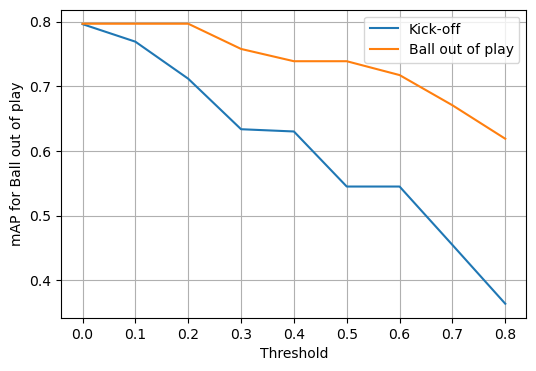

In [72]:
fig = plt.figure(figsize=(6, 4))
ax = plt.axes()
print(th, MAP)

ax.plot(th, MAP, label='Kick-off')
ax.plot(th_bop, MAP_bop, label = 'Ball out of play')

ax.set_ylabel(f"mAP for {action}")
ax.set_xlabel(f"Threshold")
plt.grid()
plt.legend()
plt.show()

### Ball out of play

In [40]:
action = 'Ball out of play'
threshold = 0.1
SEQUENCE_SIZE = 64

evaluatorT = EvaluatorThreshold(fps=1, nms_window = nms_windows, classes=classes, action=action, threshold=threshold)
dic_init = evaluatorT.evaluate_map(model.get_models(), features1, features2, SEQUENCE_SIZE, json_sols, dir_results)

print(f"mAP = {dic_init['a_mAP']}")
i = list_actions.index(action)
print(f"Init mAP of {action} is {dic['a_mAP_per_class'][i]}")
print(f"mAP th={threshold} of {action} is {dic_init['a_mAP_per_class'][i]}")

100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

mAP = 0.769096113606714
Init mAP of Ball out of play is 0.7966062533373252
mAP th=0.1 of Ball out of play is 0.7966062533373252


In [41]:
action = 'Ball out of play'
threshold = 0.5
SEQUENCE_SIZE = 64

evaluatorT = EvaluatorThreshold(fps=1, nms_window = nms_windows, classes=classes, action=action, threshold=threshold)
dic_init = evaluatorT.evaluate_map(model.get_models(), features1, features2, SEQUENCE_SIZE, json_sols, dir_results)

print(f"mAP = {dic_init['a_mAP']}")
i = list_actions.index(action)
print(f"Init mAP of {action} is {dic['a_mAP_per_class'][i]}")
print(f"mAP th={threshold} of {action} is {dic_init['a_mAP_per_class'][i]}")

100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

mAP = 0.7656851678324156
Init mAP of Ball out of play is 0.7966062533373252
mAP th=0.5 of Ball out of play is 0.7386201751742543


In [42]:
action = 'Ball out of play'
threshold = 0.25
SEQUENCE_SIZE = 64

evaluatorT = EvaluatorThreshold(fps=1, nms_window = nms_windows, classes=classes, action=action, threshold=threshold)
dic_init = evaluatorT.evaluate_map(model.get_models(), features1, features2, SEQUENCE_SIZE, json_sols, dir_results)

print(f"mAP = {dic_init['a_mAP']}")
i = list_actions.index(action)
print(f"Init mAP of {action} is {dic['a_mAP_per_class'][i]}")
print(f"mAP th={threshold} of {action} is {dic_init['a_mAP_per_class'][i]}")

100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

mAP = 0.7686526186177018
Init mAP of Ball out of play is 0.7966062533373252
mAP th=0.25 of Ball out of play is 0.7890668385241187
